### Load and Modify Configuration File

In [1]:
from configs.config_loader import load_config
config = load_config('configs/default.yaml')

version : default
seed : 1
y0 : 0.1
T : 15
N_col : 1024
N_hidden : 4
N_neurons : 50
activation : swish
N_epochs : 20000
learning_rate : 0.001
decay_rate : 1.0
freq_log : 100
freq_print : 1000
keys_print : ['loss']
reg_epochs : 10000


### Initialize Physics-Informed Neural Network

In [2]:
from model.neural_net import PhysicsInformedNN
PINN = PhysicsInformedNN(config, verbose=True)

2024-08-21 12:42:31.991228: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-21 12:42:32.029382: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-21 12:42:32.030599: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-21 12:42:32.677712: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "nested_PINN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                100       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7801 (30.47 KB)
Trainable params: 7801 (30.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
*** PINN build & init

### Train Physics-Informed Neural Network

In [3]:
training_log = PINN.train()

Training started...
    0/20000 | loss: 2.57e+00
 1000/20000 | loss: 2.91e-02
 2000/20000 | loss: 4.07e-02
 3000/20000 | loss: 3.14e-02
 4000/20000 | loss: 3.43e-02
 5000/20000 | loss: 3.08e-02
 6000/20000 | loss: 4.16e-02
 7000/20000 | loss: 3.20e-02
 8000/20000 | loss: 4.28e-02
 9000/20000 | loss: 3.51e-02
Restarting optimizer
10000
[[-0.000221890208 8.56097e-06 -4.40562471e-05 ... -6.73720715e-05 -3.23415588e-06 -0.000129910462]]
[[3.58672041e-05 6.61889654e-09 4.48201405e-08 ... 1.33916992e-05 3.27634453e-09 3.40933951e-07]]
[1.23763757e-05 -3.94318085e-05 -2.34676299e-05 ... -4.83283111e-06 -4.29480388e-05 -9.26250505e-05]
[2.86056746e-07 4.35288605e-08 2.16033023e-08 ... 1.19095269e-07 1.24153949e-08 4.89852425e-07]
[[-2.93138874e-06 -6.37356925e-06 8.11170503e-06 ... 4.18965e-06 6.04407205e-07 1.88145441e-06]
 [9.50190224e-06 6.22296284e-06 -1.46722159e-05 ... -1.98563939e-05 5.31741171e-06 6.94694972e-06]
 [3.01204932e-06 6.56317115e-06 -3.73871126e-06 ... -4.99719272e-06 -1.81

# Plot Section

In [4]:
from model.plots import learning_curves, toy_example_dynamics, loss_collocation

### Learning Curves

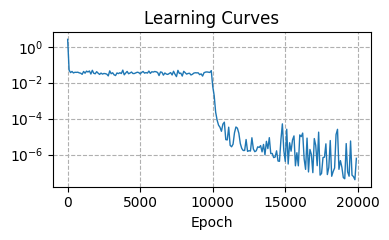

In [5]:
learning_curves(training_log)

### Toy Example Dynamics

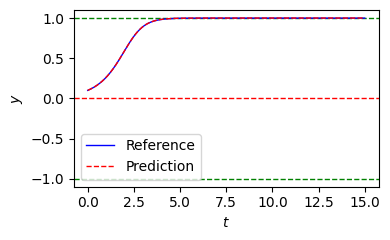

In [6]:
toy_example_dynamics(PINN)

### Loss over collocation points

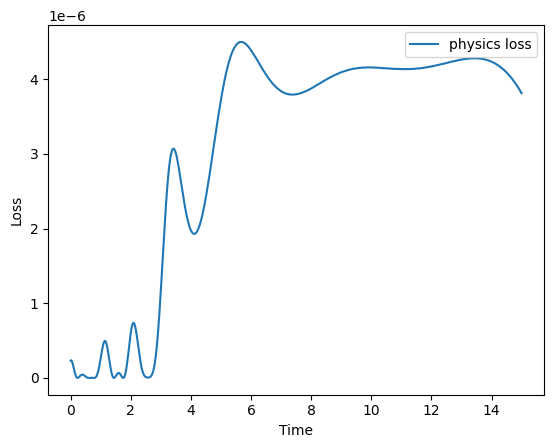

In [7]:
import tensorflow as tf
import numpy as np

t_coll = np.linspace(0, int(config["T"]), 1024).reshape(-1, 1)
t_coll = np.sort(t_coll)

t_coll = tf.convert_to_tensor(t_coll, dtype=tf.float32)

loss_collocation(PINN, t_coll)